In [2]:
from utils import plot_book
import pandas as pd

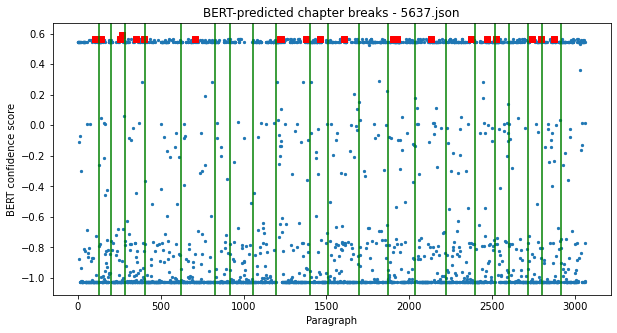

In [3]:
df = pd.read_pickle("results/results_finetuned-balanced-e1.pkl")
plot_book(df, "5637.json", fig_size=(10, 5))

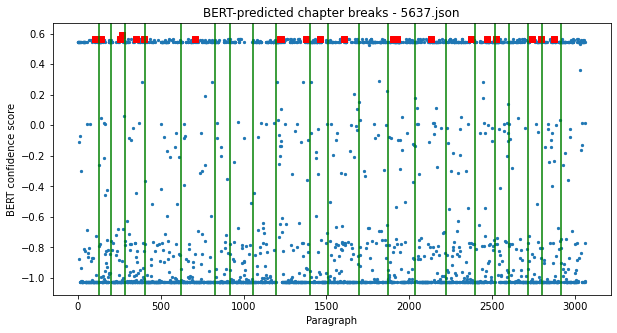

In [4]:
df = pd.read_pickle("results/results_finetuned-balanced-e1.pkl")
plot_book(df, "5637.json", fig_size=(10, 5))

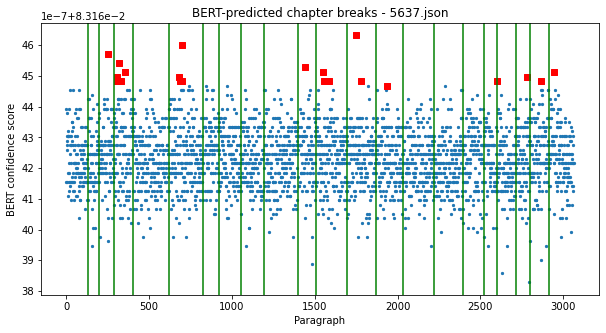

In [5]:
df = pd.read_pickle("results/results_finetuned-balanced-e4.pkl")
plot_book(df, "5637.json", fig_size=(10, 5))

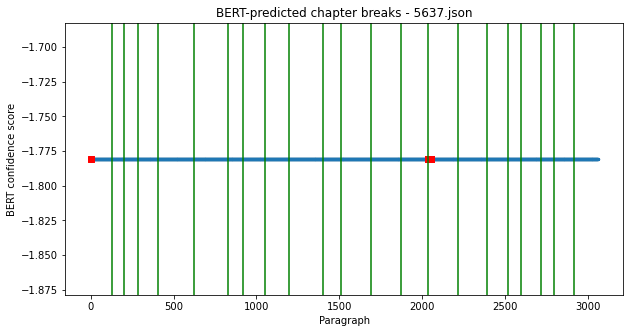

In [6]:
df = pd.read_pickle("results/results_finetuned-full.pkl")
plot_book(df, "5637.json", fig_size=(10, 5))

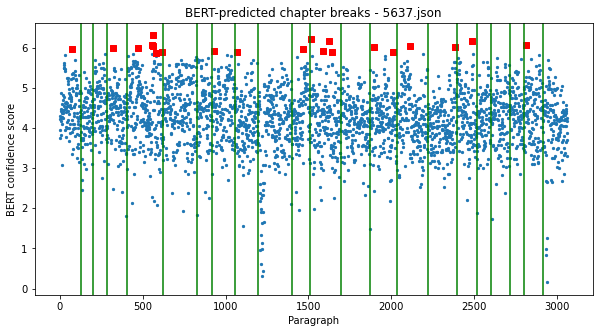

In [11]:
df = pd.read_pickle("results/results_base.pkl")
plot_book(df, "5637.json", fig_size=(10, 5))

In [7]:
import random
import matplotlib.pyplot as plt
import math
def plot_book_log(dataframe: pd.DataFrame, book_id: str = None):
    book_id = book_id
    if book_id == None:
        book_id = random.choice(dataframe["book"])
    book_df = dataframe[dataframe["book"] == book_id]
    book_df.index = [i - min(book_df.index) for i in book_df.index]
    candidates = book_df.sort_values("logit_0", ascending=False)[
        : len(book_df[book_df["label"] == 0])
    ]

    plt.figure(figsize=(20, 5))
    plt.title(f"BERT-predicted chapter breaks - {book_id}")
    plt.xlabel("Paragraph")
    plt.ylabel("BERT confidence score")
    plt.scatter(book_df.index, book_df["logit_0"].apply(lambda y: -math.log(1 - y)), s=5)
    plt.scatter(candidates.index, candidates["logit_0"].apply(lambda y: -math.log(1 - y)), c="red", marker="s")
    xcoords = book_df[book_df["label"] == 0].index
    for x in xcoords:
        plt.axvline(x, c="green")
    plt.show()

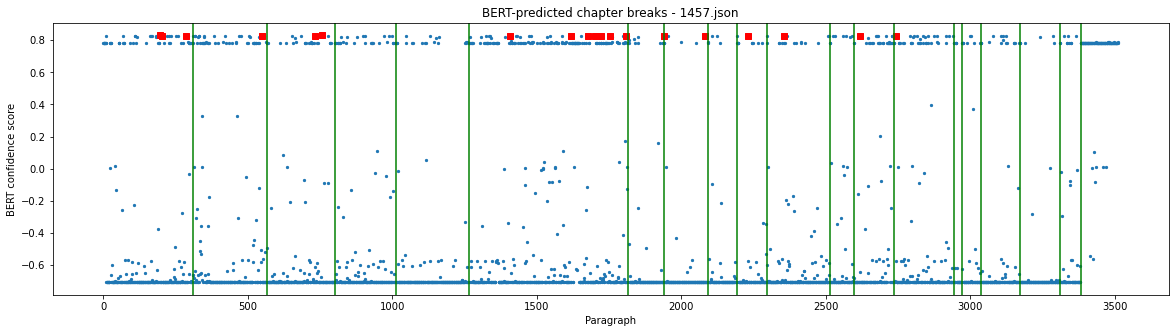

In [8]:
df = pd.read_pickle("results/results_finetuned-balanced-e1.pkl")
plot_book_log(df, "1457.json")

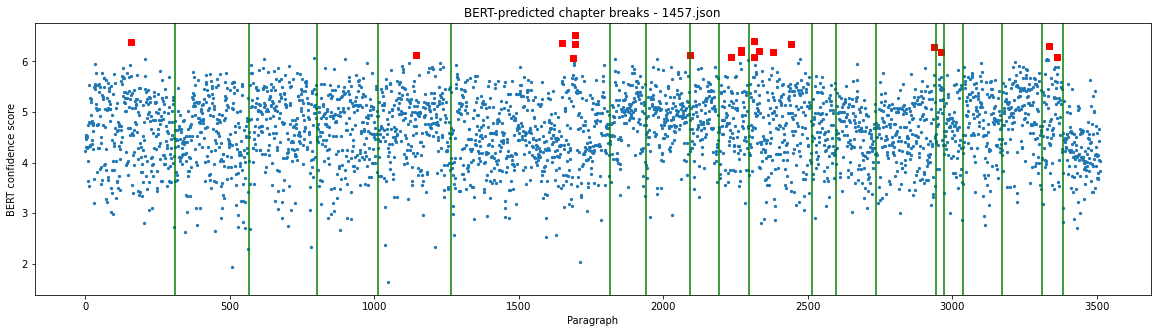

In [10]:
df = pd.read_pickle("results/results_base.pkl")
plot_book(df, "1457.json")

In [ ]:
-math.log(1 - 0.08)

0.08338160893905101

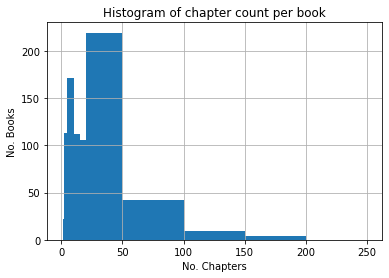

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_pickle("results/results_finetuned-full.pkl")
df.groupby("book")["chapter"].max().hist(bins=[1, 2, 5, 10, 15, 20, 50, 100, 150, 200, 250])
plt.title("Histogram of chapter count per book")
plt.xlabel("No. Chapters")
plt.ylabel("No. Books")
plt.show()